In [1]:
# Wczytanie danych
import pandas as pd
df = pd.read_csv("Mall_Customers.csv", sep=",", header=0)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


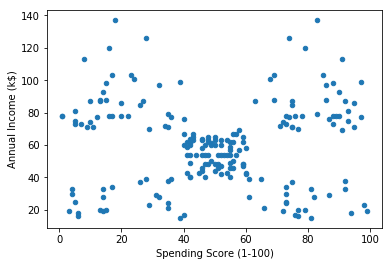

In [2]:
# Wyświetlanie danych
%matplotlib inline
import matplotlib.pyplot as plt
df.plot.scatter(x='Spending Score (1-100)', y='Annual Income (k$)')

In [3]:
# Przygotowanie danych
df = df.drop(['CustomerID'], axis=1)
df = pd.get_dummies(df)
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0


In [4]:
# Trenowanie modleu
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6, ).fit(df)

In [5]:
# Wyświetlanie przypisania w tablicy
#kmeans.labels_ 

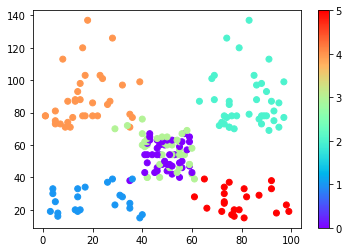

In [6]:
# Wyświetlanie przypisania w grafice
plt.scatter(x=df['Spending Score (1-100)'], y=df['Annual Income (k$)'], c=kmeans.labels_, cmap='rainbow')
plt.colorbar()

In [7]:
# Sprawdzenie nowego klienta w której będzie grupie
kmeans.predict([[40, 130, 90, 0, 1]])

array([2])

In [8]:
# Wartość sylwetki
from sklearn.metrics import silhouette_score
silhouette_score(df, kmeans.labels_)

0.4517762870734356

In [ ]:
#0.4517762870734356

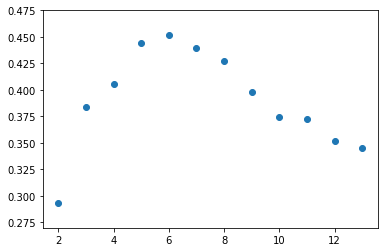

In [9]:
# Sprawdzenie innych wartości K

results = []
num_clusters = []
for i in range(2,14):
    kmeans = KMeans(n_clusters=i).fit(df)
    s = silhouette_score(df, kmeans.labels_)
    results.append(s)
    num_clusters.append(i)

plt.scatter(x=num_clusters, y=results)